<a href="https://colab.research.google.com/github/masoom-alam/FMML_2024/blob/main/FMML_M3L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [4]:
# Vectorized computation of Euclidean distance using NumPy
euclidean_dist = np.linalg.norm(x_1 - x_2)
print(euclidean_dist)



5.0


In [5]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [6]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [7]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [9]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [10]:
# Vectorized computation of Manhattan distance using NumPy
manhattan_dist = np.sum(np.abs(x_1 - x_2))
print(manhattan_dist)


7


In [11]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [12]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [14]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  4.497941445275415


In [15]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  7.0
Minkowski distance when p=2 is  5.0


In [16]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


In [17]:
from numpy.linalg import norm

# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


In [18]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)


4


In [19]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

# X, Y, Z


print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [20]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


In [21]:
def haversine(coord1, coord2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)


    print(f"Distance: " + str(km) + " km")

In [22]:
haversine([-0.116773, 51.510357], [-77.009003, 38.889931])

Distance: 5897.658 km


#KNN

In [23]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

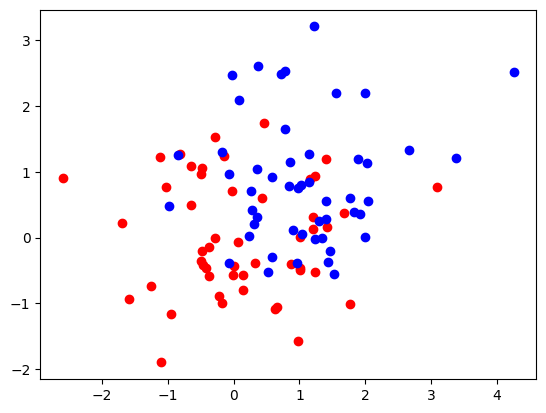

In [24]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

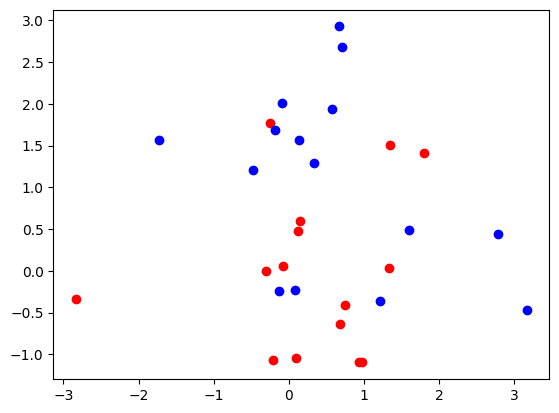

In [25]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
46.666666666666664


In [27]:
# Import the necessary libraries (if not done earlier)
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the KNN classifier with different metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for metric in metrics:
    # If using the Minkowski metric, include the p parameter for variation
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=3, metric=metric, p=3)  # You can try p=1 or p=3 for example
    else:
        knn = KNeighborsClassifier(n_neighbors=3, metric=metric)

    # Fit the model to the training data
    knn.fit(pts, tgts)

    # Make predictions on the test data
    our_predictions = knn.predict(test_pts)

    # Calculate and print the prediction accuracy for each metric
    accuracy = 100 * np.mean(our_predictions == test_tgts)
    print(f"Prediction Accuracy using {metric} distance: {accuracy:.2f}%")


Prediction Accuracy using euclidean distance: 46.67%
Prediction Accuracy using manhattan distance: 66.67%
Prediction Accuracy using chebyshev distance: 53.33%
Prediction Accuracy using minkowski distance: 53.33%


In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [29]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [30]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [31]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [32]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [33]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [34]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



#Questions to Think About and Answer:

How are similarity and distance different from each other?
Are there any conditions for a particular distance to be considered a "distance metric"

Similarity and distance are two related but distinct concepts often used in machine learning and data analysis, especially in clustering, classification, and recommendation systems. Here's how they differ:

Similarity:
Measures how alike two data points are.
Higher similarity means that two objects are more similar or "closer" to each other.
Common similarity measures include cosine similarity, Jaccard similarity, and correlation.
A similarity score typically ranges from 0 (no similarity) to 1 (perfect similarity).
Example: In text analysis, cosine similarity between two text documents tells us how similar they are based on the angle between their word vector representations.
Distance:
Measures how far apart two data points are.
Lower distance means that two objects are closer together.
Common distance metrics include Euclidean distance, Manhattan distance, Minkowski distance, and Hamming distance.
Distance is usually non-negative and unbounded. A smaller distance value indicates more similarity, and a larger value indicates dissimilarity.
Example: Euclidean distance measures the straight-line distance between two points in a multidimensional space.

Conditions for a Distance to be Considered a "Distance Metric"
A distance measure can be considered a distance metric if it satisfies the following properties (these are known as the metric space axioms):

Non-negativity (Positivity):
For any two points
x and
y, the distance
d(x,y)≥0.
The distance is always non-negative.
Identity of Indiscernibles:
For any two points
x and
y
d(x,y)=0 if and only if
x=y.
This means that the distance between two distinct points cannot be zero, and the distance between a point and itself is always zero.
Symmetry:
For any two points
x and
y,
d(x,y)=d(y,x).
This ensures that the distance between two points is the same in both directions.
Triangle Inequality:
For any three points
x,
y, and
z,
d(x,z)≤d(x,y)+d(y,z).
This ensures that taking a "direct" path between two points is always shorter or equal to taking an indirect path through a third point.